# Отчет

**Репозиторий https://github.com/andkorobov/progect_for_bd/**


## Пару слов о возможностях, которые были реализованы:
* Чтение файлов формата vowpal wabbit. Вообще я старался сделать что-то подолбное vowpal wabbit. Путь к файлу подаётся либо первым аргументом командной сторки, либо используя аргумент: "-d file_path"
* Используется статистический градиент: 
  $$ w_{n+1} = w_n - grad(Los(w)) * \frac \mu n   $$ 
  Где $\mu$ задаётся с помощью аргумента командной строки "--initial_t"
* Все фичи воспринимаются как стоки, а затем хэшируются. Логарифм виличины хэша передаётся через аргумент командной строки "--bit_precision".
* Есть возможность создавать квадратичные фичи по аналогии с vowpal wabbit, используя аргумент командной строки "--quadratic arg"
* Для запуска в режиме тестирования нужно использовать аргумент командной строки "--testonly"
* Алгоритм может несколько раз проходить по файлу. Для того, чтобы задать колличество проходов нужно использовать аргумент командной строки "--passes"
* Алгоритм умеет работать с двумя функциями потерь: квадратичной и логистической. Чтобы задать нужно истользовать аргумент "--loss_function arg"
* Реализовано два вида регуляризации: L1 и L2. Соответственно задаются с помощью аргументов "--l1 arg" и "--l12 arg"
* Чтобы задать путь к файлу результирующей модели, используется аргумент "--final_regressor"
* Чтобы задать путь к файлу с предсказанием, используется аргумент "--predictions"
* Вывод возможен рёх видов identity (число от $-\infty$ до $+\infty$), logistic (число от 0 до 1) or glf1 (число от -1 до 1). Для этого используется агрумент "--link arg"
* При первом проходе файл кешируется. Затем уше проход веется по файлу с кешем, не используя исходный (файл с кешем примерно в полтора разо меньше и в более удобном формате для чтения). Можно задать путь для файла с помощью команды "--cache_file arg"
* Есть возможность использовать адаптивный learning rate (с помощью команды "--adaptive")


## Компиляция 
Использовались возможности c++11. Рекомендуется компилировать следующем образом:

In [2]:
!g++ -std=c++0x -O3 main.cpp -o main

## Пример запуска

В качестве примера рассмотрим известную задачу Titanic: https://www.kaggle.com/c/titanic. 

Для подготовки выборки я использовал скрипты из статьи: https://habrahabr.ru/company/mlclass/blog/248779/

Для примера воспользуемся произвольным параметрами:

In [3]:
!./main --loss_function logistic -d /ssd_data/titanic/train.vw \
--passes 10 --bit_precision 24 -l2 0.001 -l1 0.001 --final_regressor \
/ssd_data/titanic/model --link logistic --cache --adaptive --quadratic ff

input_path = /ssd_data/titanic/train.vw
loss_function = logistic
hash_size = 16777216
passes = 10
initial_t = 0.5
l1 = 0.001
l2 = 0.001
testonly = 0
adaptive = 1
final_regressor = /ssd_data/titanic/model
cache_file = /ssd_data/titanic/train.vw.cache
link = logistic
quadratic = [ff]

Iteration num   | average loss  |  from last    |  lable        | yPredicted    | current t
------------------------------------------------------------------------------------------------
2		| 11.09657383	| 22.19314766	| 1.00000000	| 0.00000000	| 0.25000000
4		| 8.48564816	| 5.87472200	| 1.00000000	| 0.02432220	| 0.12500000
8		| 4.24332428	| 0.00100060	| -1.00000000	| 0.00038517	| 0.06250000
16		| 2.45841146	| 0.67349821	| 1.00000000	| 0.69759506	| 0.03125000
32		| 1.74550629	| 1.03260100	| 1.00000000	| 0.99982423	| 0.01562500
64		| 1.04915321	| 0.35280034	| -1.00000000	| 0.00007099	| 0.00781250
128		| 1.01093531	| 0.97271782	| 1.00000000	| 0.00036033	| 0.00390625
256		| 0.95923269	| 0.90753013	| 1.0000000

In [4]:
!./main -d /ssd_data/titanic/test.vw  --final_regressor /ssd_data/titanic/model \
--predictions /ssd_data/titanic/predict.txt --testonly

input_path = /ssd_data/titanic/test.vw
loss_function = logistic
hash_size = 16777216
passes = 1
initial_t = 0.5
l1 = 0.001
l2 = 0.001
testonly = 1
adaptive = 0
final_regressor = /ssd_data/titanic/model
predictions = /ssd_data/titanic/predict.txt
link = logistic
quadratic = [ff]

Iteration num   | average loss  |  from last    |  lable        | yPredicted    | current t
------------------------------------------------------------------------------------------------
2		| 6.59966850	| 13.19933701	| 1.00000000	| 0.75588983	| 0.25000000
4		| 8.66672611	| 10.73378468	| 1.00000000	| 0.00000000	| 0.12500000
8		| 6.89986324	| 5.13300133	| 1.00000000	| 0.00048999	| 0.06250000
16		| 5.79839802	| 4.69693327	| 1.00000000	| 0.99032623	| 0.03125000
32		| 5.99392796	| 6.18945980	| 1.00000000	| 0.00040873	| 0.01562500
64		| 5.98691225	| 5.97989559	| 1.00000000	| 0.51617122	| 0.00781250
128		| 5.55765676	| 5.12839937	| 1.00000000	| 0.62533611	| 0.00390625
256		| 5.65012741	| 5.74259281	| 1.00000000	| 0.

Посмотрим что же вышло:

In [5]:
! head /ssd_data/titanic/predict.txt

0
0.75589
0.000122357
0
0.890314
0
0.444748
0.000489988
0.916958
0


Напишем функцию для чтения результата:

In [11]:
import numpy as np

In [28]:
def read_predict(path):
    predict = []
    with open(path) as predict_file:
        for line in predict_file.readlines():
            predict.append(float(line))
    return np.array(predict)
            
read_predict('/ssd_data/titanic/predict.txt')[:10]

array([  0.00000000e+00,   7.55890000e-01,   1.22357000e-04,
         0.00000000e+00,   8.90314000e-01,   0.00000000e+00,
         4.44748000e-01,   4.89988000e-04,   9.16958000e-01,
         0.00000000e+00])

Сравним с тем что было:

In [15]:
import pandas as pd

In [22]:
test_csv = pd.read_csv('/ssd_data/titanic/test.csv')

In [23]:
test_csv[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Видно, что результатов тут нет. Поэтому было решено воспользоваться уже готовым решением и сравнивать с ним: https://www.kaggle.com/benhamner/titanic/random-forest-benchmark-r/code

In [25]:
test_csv = pd.read_csv('/ssd_data/titanic/1_random_forest_r_submission .csv')

In [27]:
test_csv[:10]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


посчитаем logloss

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn import metrics

(418,) (418,)


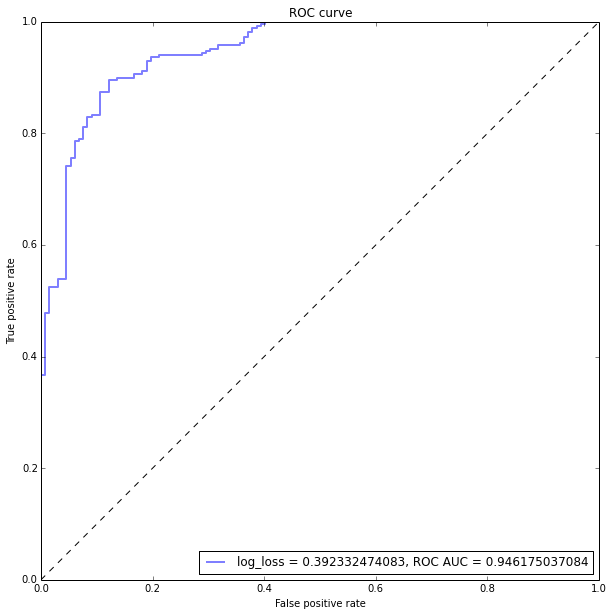

In [54]:
def plot_res():
    plt.figure(figsize=(10, 10))

    plt.plot([0, 1], [0, 1], 'k--')

    scores = read_predict('/ssd_data/titanic/predict.txt')
    y_pred = np.array([[1 - score, score] for score in scores])
    y_true = test_csv['Survived'].values
    print y_true.shape, scores.shape
 
    _log_loss = log_loss(y_true, y_pred)

    fpr, tpr, thresholds = metrics.roc_curve(y_true, 1 - scores, pos_label=0)
    roc_auc= metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='log_loss = {}, ROC AUC = {}'.format(_log_loss, roc_auc), alpha=0.5, linewidth=2)


    plt.legend(loc=4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    
plot_res()

Получился вполне неплохой результат. Попробуем запустить без каких-то параметров. Будем использовать subprocess.Popen

In [55]:
from subprocess import PIPE, Popen

In [128]:
def run_lerning(input_file='/ssd_data/titanic/train.vw', 
               final_regressor='/ssd_data/titanic/model',
               l1=0.001,
               l2=0.001,
               configs = {}):
    line = './main -d {input_file} --final_regressor {final_regressor}'\
           .format(input_file=input_file, final_regressor=final_regressor)
    if l1:
        line += ' -l1 {}'.format(l1)
    if l2:
        line += ' -l2 {}'.format(l2)
    for k, v in configs.items():
        line += ' --{}'.format(k)
        if v is not None:
            line += ' {}'.format(v)

    Popen(line.split()).wait()
    
def run_predict(input_file='/ssd_data/titanic/test.vw', 
               final_regressor='/ssd_data/titanic/model',
               predictions='/ssd_data/titanic/predict.txt'):
    line = './main -d {}  --final_regressor {} --predictions {} --testonly'\
            .format(input_file, final_regressor, predictions)

    Popen(line.split()).wait()

def get_log_loss(predictions='/ssd_data/titanic/predict.txt'):
    scores = read_predict('/ssd_data/titanic/predict.txt')
    y_pred = np.array([[1 - score, score] for score in scores])
    y_true = test_csv['Survived'].values
    return log_loss(y_true, y_pred)

Проверим:

In [77]:
run_lerning(configs={'loss_function': 'logistic', 
                     'passes': 10,
                     'bit_precision': 24,
                     'link': 'logistic',
                     'cache': None,
                     'adaptive': None,
                     'quadratic': 'ff'})
run_predict()
get_log_loss()

0.39233247408345967

Получилось тоже самое. Возьмем квадратичную функцию ошибки: 

In [96]:
def check_config(configs):
    run_lerning(configs=configs)
    run_predict()
    return get_log_loss()
check_config(configs={'passes': 10,
                      'bit_precision': 24,
                      'link': 'logistic',
                      'cache': None,
                      'adaptive': None,
                      'quadratic': 'ff'})

0.28557430165952835

Получили результат ближе к случайному лесу. Уберем теперь quadratic:

In [97]:
check_config(configs={'passes': 10,
                      'bit_precision': 24,
                      'link': 'logistic',
                      'cache': None,
                      'adaptive': None})

0.46986103142540991

Стало хуже. Если убирать adaptive, то расходится (adaptive в дополнение делает нормализацию). 

Проверим для различных регуляризаций:

In [134]:
results = {}
passes = 10
for l1 in np.logspace(-6, 4, 6):
    for l2 in np.logspace(-6, 4, 6):
            for loss_function in ['logistic', 'quadratic']:
                run_lerning(l1=l1, l2=l2,
                            configs={'loss_function': loss_function, 
                                     'passes': 10,
                                     'bit_precision': 24,
                                     'link': 'logistic',
                                     'cache': None,
                                     'adaptive': None,
                                     'quadratic': 'ff'})
                run_predict()
                results[(l1, l2, passes, loss_function)] = get_log_loss()
                print l1, l2, passes, loss_function, get_log_loss()

1e-06 1e-06 10 logistic 0.377856505718
1e-06 1e-06 10 quadratic 0.285579402274
1e-06 0.0001 10 logistic 0.377481942511
1e-06 0.0001 10 quadratic 0.285579308369
1e-06 0.01 10 logistic 0.354571848541
1e-06 0.01 10 quadratic 0.285572354108
1e-06 1.0 10 logistic 0.276531742992
1e-06 1.0 10 quadratic 0.28488674483
1e-06 100.0 10 logistic 0.321280675346
1e-06 100.0 10 quadratic 0.264252848002
1e-06 10000.0 10 logistic 0.347533532568
1e-06 10000.0 10 quadratic 0.319150340102
0.0001 1e-06 10 logistic 0.382602164256
0.0001 1e-06 10 quadratic 0.285578933075
0.0001 0.0001 10 logistic 0.382307084408
0.0001 0.0001 10 quadratic 0.285578914185
0.0001 0.01 10 logistic 0.356680798591
0.0001 0.01 10 quadratic 0.285571931625
0.0001 1.0 10 logistic 0.276544395309
0.0001 1.0 10 quadratic 0.284886252136
0.0001 100.0 10 logistic 0.321281113255
0.0001 100.0 10 quadratic 0.264252860778
0.0001 10000.0 10 logistic 0.34753357459
0.0001 10000.0 10 quadratic 0.31915037975
0.01 1e-06 10 logistic 0.396877501102
0.01 

отсортируем и выведем 5 наилучших варианта:

In [138]:
best = sorted([(v, k) for k, v in results.items()])[:5]
print '   l1    |    l2   | passes | loss_function | log_loss'
for _log_loss, (l1, l2, passes, loss_function) in best:
    print ' {:7s} | {:7s} | {:6s} | {:13s} | {}'\
           .format(str(l1), str(l2), str(passes), loss_function, _log_loss)

   l1    |    l2   | passes | loss_function | log_loss
 1e-06   | 100.0   | 10     | quadratic     | 0.264252848002
 0.0001  | 100.0   | 10     | quadratic     | 0.264252860778
 0.01    | 100.0   | 10     | quadratic     | 0.264254846591
 1.0     | 100.0   | 10     | quadratic     | 0.264819563921
 1e-06   | 1.0     | 10     | logistic      | 0.276531742992


Попробуем для них посмотреть зависимость от колличества проходов:

In [140]:
for _log_loss, (l1, l2, p, loss_function) in best:
    for passes in [1, 2, 4, 8, 16, 32]:
        run_lerning(l1=l1, l2=l2,
                    configs={'loss_function': loss_function, 
                             'passes': passes,
                             'bit_precision': 24,
                             'link': 'logistic',
                             'cache': None,
                             'adaptive': None,
                             'quadratic': 'ff'})
        run_predict()
        results[(l1, l2, passes, loss_function)] = get_log_loss()
        print l1, l2, passes, loss_function, get_log_loss()

1e-06 100.0 1 quadratic 0.257002600994
1e-06 100.0 2 quadratic 0.25954456856
1e-06 100.0 4 quadratic 0.261841735569
1e-06 100.0 8 quadratic 0.263733963008
1e-06 100.0 16 quadratic 0.265210519662
1e-06 100.0 32 quadratic 0.266324675053
0.0001 100.0 1 quadratic 0.257002646517
0.0001 100.0 2 quadratic 0.259544601102
0.0001 100.0 4 quadratic 0.261841830734
0.0001 100.0 8 quadratic 0.263734016931
0.0001 100.0 16 quadratic 0.265210499396
0.0001 100.0 32 quadratic 0.266324711416
0.01 100.0 1 quadratic 0.257007173093
0.01 100.0 2 quadratic 0.259548213517
0.01 100.0 4 quadratic 0.26184454692
0.01 100.0 8 quadratic 0.263736143148
0.01 100.0 16 quadratic 0.265212174382
0.01 100.0 32 quadratic 0.266326047181
1.0 100.0 1 quadratic 0.257936281914
1.0 100.0 2 quadratic 0.260330530139
1.0 100.0 4 quadratic 0.262512666395
1.0 100.0 8 quadratic 0.264321420118
1.0 100.0 16 quadratic 0.265740941822
1.0 100.0 32 quadratic 0.266816152487
1e-06 1.0 1 logistic 0.282343784837
1e-06 1.0 2 logistic 0.27983330852

In [148]:
best = sorted([(v, k) for k, v in results.items()])[:40]
print ' N |   l1    |    l2   | passes | loss_function | log_loss'
i = 0
for _log_loss, (l1, l2, passes, loss_function) in best:
    print '{:2} | {:7s} | {:7s} | {:6s} | {:13s} | {}'\
           .format(i, str(l1), str(l2), str(passes), loss_function, _log_loss)
    i += 1

 N |   l1    |    l2   | passes | loss_function | log_loss
 0 | 1e-06   | 100.0   | 1      | quadratic     | 0.257002600994
 1 | 0.0001  | 100.0   | 1      | quadratic     | 0.257002646517
 2 | 0.01    | 100.0   | 1      | quadratic     | 0.257007173093
 3 | 1.0     | 100.0   | 1      | quadratic     | 0.257936281914
 4 | 1e-06   | 100.0   | 2      | quadratic     | 0.25954456856
 5 | 0.0001  | 100.0   | 2      | quadratic     | 0.259544601102
 6 | 0.01    | 100.0   | 2      | quadratic     | 0.259548213517
 7 | 1.0     | 100.0   | 2      | quadratic     | 0.260330530139
 8 | 1e-06   | 100.0   | 4      | quadratic     | 0.261841735569
 9 | 0.0001  | 100.0   | 4      | quadratic     | 0.261841830734
10 | 0.01    | 100.0   | 4      | quadratic     | 0.26184454692
11 | 1.0     | 100.0   | 4      | quadratic     | 0.262512666395
12 | 1e-06   | 100.0   | 8      | quadratic     | 0.263733963008
13 | 0.0001  | 100.0   | 8      | quadratic     | 0.263734016931
14 | 0.01    | 100.0   | 8      |

Как видно из результатов quadratic ближе к случайному лесу, чем logistic. Попробуем залить на сайт https://www.kaggle.com/c/titanic некоторые из вариантов 

In [153]:
_log_loss, (l1, l2, passes, loss_function) = best[0]
run_lerning(l1=l1, l2=l2,
            configs={'loss_function': loss_function, 
                     'passes': passes,
                     'bit_precision': 24,
                     'link': 'logistic',
                     'cache': None,
                     'adaptive': None,
                     'quadratic': 'ff'})
run_predict()
scores = read_predict('/ssd_data/titanic/predict.txt')
y_pred = np.array([int(score > 0.5) for score in scores])
res = pd.DataFrame({'PassengerId': np.array(range(892, 892 + 418)),
                    'Survived': y_pred})
res.to_csv('/ssd_data/titanic/predict.csv', index=False)

Получился результат 0.77512 (2734 место)

In [155]:
_log_loss, (l1, l2, passes, loss_function) = best[28]
run_lerning(l1=l1, l2=l2,
            configs={'loss_function': loss_function, 
                     'passes': passes,
                     'bit_precision': 24,
                     'link': 'logistic',
                     'cache': None,
                     'adaptive': None,
                     'quadratic': 'ff'})
run_predict()
scores = read_predict('/ssd_data/titanic/predict.txt')
y_pred = np.array([int(score > 0.5) for score in scores])
res = pd.DataFrame({'PassengerId': np.array(range(892, 892 + 418)),
                    'Survived': y_pred})
res.to_csv('/ssd_data/titanic/predict.csv', index=False)

Получился тоже самое. Залил результат случайных деревьев, получил результат 0.78469. Лучше, но не значительно.